In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import json


In [2]:
# Define the graph as a dictionary
graph_dict = {
    "A": {"B": {"volume": "?"}, "C": {"volume": 3},   "D": {"volume": 2}},
    "B": {"A": {"volume": "?"}, "E": {"volume": 3},   "F": {"volume": 6}},
    "C": {"A": {"volume": 4},   "G": {"volume": "?"}, "H": {"volume": 3}},
    "D": {"A": {"volume": 3},   "I": {"volume": 6},   "J": {"volume": 8}},
    "E": {"B": {"volume": 5},   "K": {"volume": 7}},
    "F": {"B": {"volume": 7},   "L": {"volume": 4}},
    "G": {"C": {"volume": "?"}, "M": {"volume": 6}},
    "H": {"C": {"volume": 3},   "N": {"volume": 5}},
    "I": {"D": {"volume": 7},   "O": {"volume": 5}},
    "J": {"D": {"volume": 7},   "P": {"volume": 8}},
    "K": {"E": {"volume": 8}},
    "L": {"F": {"volume": 3}},
    "M": {"G": {"volume": 7}},
    "N": {"H": {"volume": 2}},
    "O": {"I": {"volume": 10}},
    "P": {"J": {"volume": 8}},
}


In [3]:
def get_previous_next_neighbors(graph_dict, node):
    nodes = list(graph_dict.keys())
    index = nodes.index(node)
    previous_node = nodes[index - 1] if index > 0 else nodes[-1]
    next_node = nodes[index + 1] if index < len(nodes) - 1 else nodes[0]
    return previous_node, next_node

def calculate_avg_volume(graph_dict, current_node, neighbor_node, direction):
    volumes = []

    if direction == "outgoing":
        for neighbor, attributes in graph_dict[current_node].items():
            if neighbor != neighbor_node and attributes["volume"] != "?":
                volumes.append(attributes["volume"])

        for neighbor, attributes in graph_dict[neighbor_node].items():
            if neighbor != current_node and attributes["volume"] != "?":
                volumes.append(attributes["volume"])

    elif direction == "ingoing":
        for neighbor, attributes in graph_dict[neighbor_node].items():
            if neighbor != current_node and attributes["volume"] != "?":
                volumes.append(attributes["volume"])

        for neighbor, attributes in graph_dict[current_node].items():
            if neighbor != neighbor_node and attributes["volume"] != "?":
                volumes.append(attributes["volume"])

    return round(sum(volumes) / len(volumes)) if volumes else 0


# Iterate through the dictionary and fill missing volumes
for node, neighbors in graph_dict.items():
    for neighbor, attributes in neighbors.items():
        if attributes["volume"] == "?":
            avg_volume_outgoing = calculate_avg_volume(graph_dict, node, neighbor, "outgoing")
            avg_volume_ingoing = calculate_avg_volume(graph_dict, neighbor, node, "ingoing")
            attributes["volume"] = avg_volume_outgoing
            graph_dict[neighbor][node]["volume"] = avg_volume_ingoing




In [4]:
# Save graph_dict as json for further usage
with open("graphJson.json", "w") as f:
    json.dump(graph_dict, f, indent=4)

In [5]:
# Create an empty directed graph
G = nx.DiGraph()

In [6]:

# Iterate through the dictionary and add edges along with their attributes
for node, neighbors in graph_dict.items():
    for neighbor, attributes in neighbors.items():
        G.add_edge(node, neighbor, **attributes)

In [7]:
pos = nx.spring_layout(G, seed=2)
labels = {(u, v): data["volume"] for u, v, data in G.edges(data=True)}


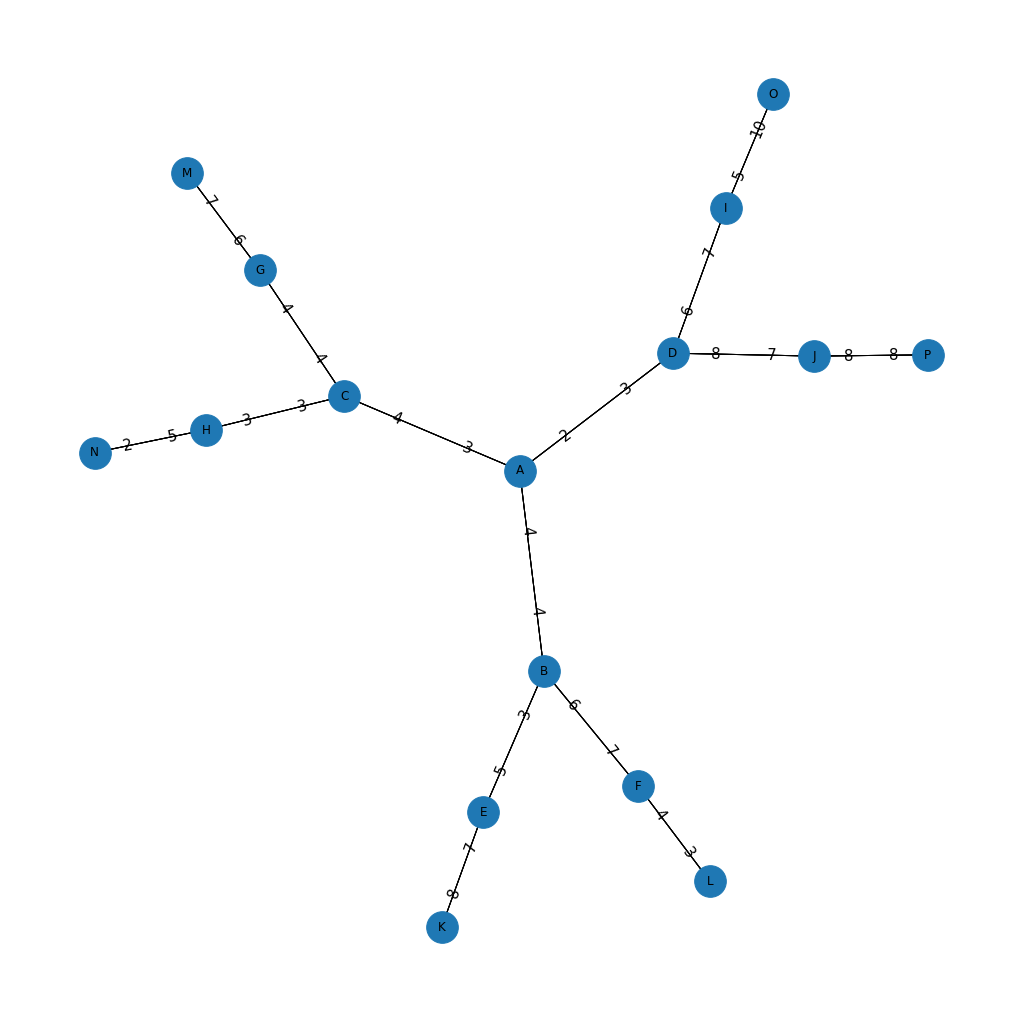

In [22]:

plt.figure(figsize=(14, 14))
nx.draw(G, pos=pos, with_labels=True)
nx.draw_networkx_nodes(G, pos=pos, node_size=1000)
nx.draw_networkx_edge_labels(
    G, pos, labels, label_pos=0.7,  bbox=dict(alpha=0), font_size=15
)
nx.draw_networkx_edges(G, pos, arrows=True)
plt.savefig("digraph_after_change.png", dpi=400)
plt.show()

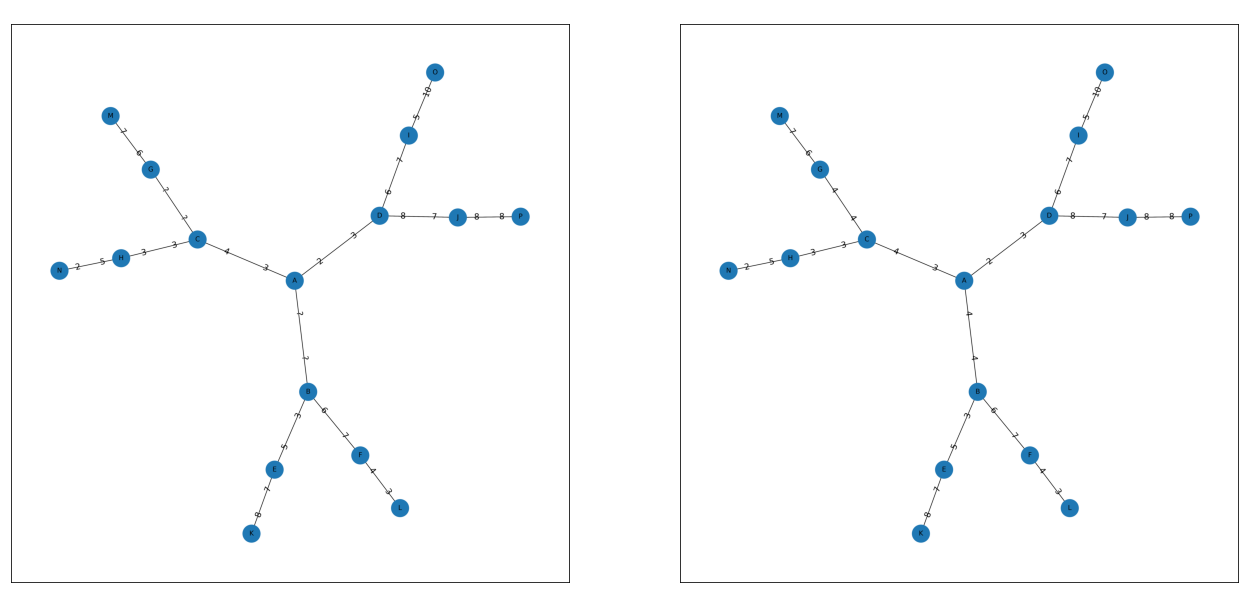

In [23]:
#Side by side comparison, to do this you need to change the names when saving them previously and run the codes twice, one without the functions and one with
import matplotlib.pyplot as plt

before=plt.imread("digraph_before_change.png")
after=plt.imread("digraph_after_change.png")

# create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(22, 12))

# display the images in the subplots
axes[0].imshow(before)
axes[1].imshow(after)

# set the titles of the subplots
axes[0].set_title("Before Change", color="white", fontsize=15)
axes[1].set_title("After Change", color="white", fontsize=15)

# hide the tick labels on the subplots
for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])

# display the figure
plt.show()

#*Testing to see if the code works if i add more nodes and missing attributes*

In [24]:
import networkx as nx
import matplotlib.pyplot as plt
import json


#Remember to reset kernel
#Added Q to A and R & S to Q
# Define the graph as a dictionary
graph_dict = {
    "A": {"B": {"volume": "?"}, "C": {"volume": 3},   "D": {"volume": 2}, "Q": {"volume": "?"}},
    "B": {"A": {"volume": "?"}, "E": {"volume": 3},   "F": {"volume": 6}},
    "C": {"A": {"volume": 4},   "G": {"volume": "?"}, "H": {"volume": 3}},
    "D": {"A": {"volume": 3},   "I": {"volume": 6},   "J": {"volume": 8}},
    "E": {"B": {"volume": 5},   "K": {"volume": 7}},
    "F": {"B": {"volume": 7},   "L": {"volume": 4}},
    "G": {"C": {"volume": "?"}, "M": {"volume": 6}},
    "H": {"C": {"volume": 3},   "N": {"volume": 5}},
    "I": {"D": {"volume": 7},   "O": {"volume": 5}},
    "J": {"D": {"volume": 7},   "P": {"volume": 8}},
    "K": {"E": {"volume": 8}},
    "L": {"F": {"volume": 3}},
    "M": {"G": {"volume": 7}},
    "N": {"H": {"volume": 2}},
    "O": {"I": {"volume": 10}},
    "P": {"J": {"volume": 8}},
    "Q": {"A": {"volume": "?"},"R": {"volume": 3}, "S": {"volume": 5}},
    "R": {"Q": {"volume": 5}},
    "S": {"Q": {"volume": 7}}
}



In [25]:
def get_previous_next_neighbors(graph_dict, node):
    nodes = list(graph_dict.keys())
    index = nodes.index(node)
    previous_node = nodes[index - 1] if index > 0 else nodes[-1]
    next_node = nodes[index + 1] if index < len(nodes) - 1 else nodes[0]
    return previous_node, next_node

def calculate_avg_volume(graph_dict, current_node, neighbor_node, direction):
    volumes = []

    if direction == "outgoing":
        for neighbor, attributes in graph_dict[current_node].items():
            if neighbor != neighbor_node and attributes["volume"] != "?":
                volumes.append(attributes["volume"])

        for neighbor, attributes in graph_dict[neighbor_node].items():
            if neighbor != current_node and attributes["volume"] != "?":
                volumes.append(attributes["volume"])

    elif direction == "ingoing":
        for neighbor, attributes in graph_dict[neighbor_node].items():
            if neighbor != current_node and attributes["volume"] != "?":
                volumes.append(attributes["volume"])

        for neighbor, attributes in graph_dict[current_node].items():
            if neighbor != neighbor_node and attributes["volume"] != "?":
                volumes.append(attributes["volume"])

    return round(sum(volumes) / len(volumes)) if volumes else 0


# Iterate through the dictionary and fill missing volumes
for node, neighbors in graph_dict.items():
    for neighbor, attributes in neighbors.items():
        if attributes["volume"] == "?":
            avg_volume_outgoing = calculate_avg_volume(graph_dict, node, neighbor, "outgoing")
            avg_volume_ingoing = calculate_avg_volume(graph_dict, neighbor, node, "ingoing")
            attributes["volume"] = avg_volume_outgoing
            graph_dict[neighbor][node]["volume"] = avg_volume_ingoing

In [26]:

# Save graph_dict as json for further usage
with open("graphJson.json", "w") as f:
    json.dump(graph_dict, f, indent=4)



In [27]:
# Create an empty directed graph
G = nx.DiGraph()


In [28]:

# Iterate through the dictionary and add edges along with their attributes
for node, neighbors in graph_dict.items():
    for neighbor, attributes in neighbors.items():
        G.add_edge(node, neighbor, **attributes)

In [29]:
pos = nx.spring_layout(G, seed=1, k=0.05, scale=2)
labels = {(u, v): data["volume"] for u, v, data in G.edges(data=True)}


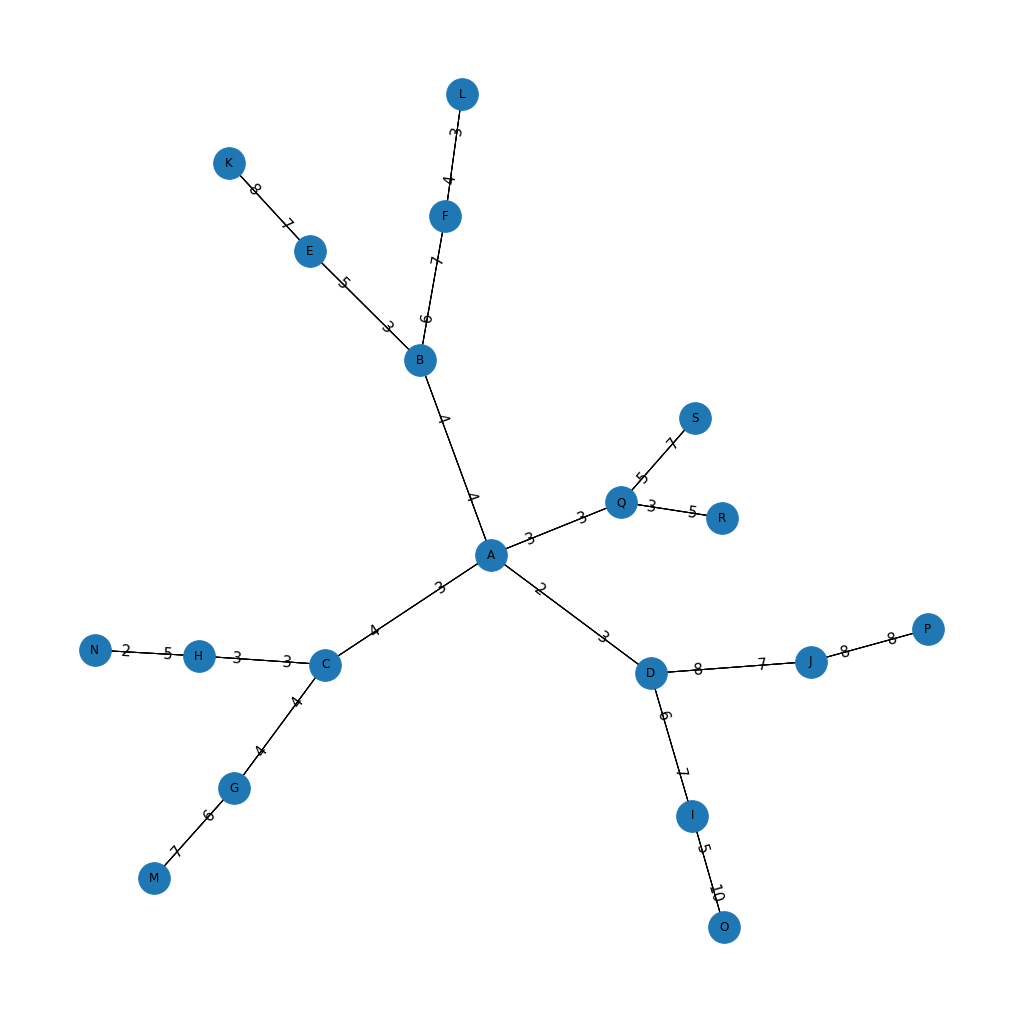

In [30]:

plt.figure(figsize=(14, 14))
nx.draw(G, pos=pos, with_labels=True)
nx.draw_networkx_nodes(G, pos=pos, node_size=1000)
nx.draw_networkx_edge_labels(
    G, pos, labels, label_pos=0.7,  bbox=dict(alpha=0), font_size=15
)
nx.draw_networkx_edges(G, pos, arrows=True)
plt.savefig("testing_digraph_new.png", dpi=400)
plt.show()

#Look at A-Q. It should be 4 from A-Q and 4 from Q-A (not 3 & 3)

This is still not correct, for some reason the code works for the first dictionairy, but not after testing on the second. Will look into this further.
Additionally, after this works, I will take a look at more variables that can be used in the equation (not just averages). 
This is because although the average is an OK measure, it would not be very realistic if for example one of the roads from the intersection is an E-road and the other is an R or F-road, then they would be weighted the same way. In reality, most of the traffic would probably flow towards the E-road. 